### Домашнее задание


**Методы** снижения размерности.

Задача: написать функцию, которая отрисовывает датасет в виде одного графика в 2D или 3D.

Функция:
принимает на вход датасет
достает из него числовые функции
с помощью SVD или PCA снижает размерность данным

Результат: отрисовывает датасет в виде scatter plot в 2D или 3D

Результат: ноутбук с функцией и тестовым примером.
6 баллов за отрисовку датасета в 2D
2 балла за возможность отрисовки датасета в 2D или 3D по выбору
2 балла за перевод нечисловых признаков (если уникальные значения в датасете не больше 2) в числовые.

Дедлайн: 13 октября 2024 года


### импорты

In [2]:
# импорты
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
# from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import datasets, decomposition, cluster, metrics, preprocessing

### функция подготовки df (очистка и перевод нечисловых значений в числовые)

In [3]:
def get_cleared_df(df: pd.core.frame.DataFrame) -> pd.core.frame.DataFrame:
  # удаляем все NaN из df
  df.dropna(inplace=True)
  # print(df.info())
  # print(df.describe())
  # print(f'Столбцы датасета: {df.columns}')

  # получаем нечисловые столбцы
  non_numerics_cols = df.columns[df.dtypes == 'object']
  # print(f'Колонки с нечисловыми признаками {non_numerics_cols}')

  # обходим все нечисловые столбцы
  for non_numeric_column in non_numerics_cols:
    # print(f'Нечисловой столбец: {non_numeric_column}, количество уникальных значений: {len(df[non_numeric_column].value_counts())}')
    # если количество уникальных значений в столбце больше двух, то удаляем его из df
    if len(df[non_numeric_column].value_counts()) > 2:
      df = df.drop(columns=[non_numeric_column])
      # или так
      # del df[non_numeric_column]
    else:
      # переводим нечисловые значения в числовые (0 или 1)
      df[non_numeric_column] = df[non_numeric_column].map(lambda x: 0 if x == df[non_numeric_column].unique()[0] else 1)

  # print(df.info())
  # print(df)

  # возвращаем очищенный df
  return(df)

### функция снижения размерности данных df

In [10]:
def get_reduced_df(df: pd.core.frame.DataFrame, dimension = 2) -> pd.core.frame.DataFrame:
  # преобразуем df в массив numpy
  array = df.to_numpy()

  # print('Массив после преобразования df')
  # print(array)

  # используем стандартный масштабатор
  scaled_array = preprocessing.StandardScaler().fit_transform(array)

  # ================================================
  # PCA
  # pca = decomposition.PCA(n_components=dimension)

  # # обучение на нормализованных данных
  # pca.fit(scaled_array)
  # scaled_array_pca = pca.transform(scaled_array)

  # # обучение на НЕ нормализованных данных
  # # pca.fit(array)
  # # scaled_array_pca = pca.transform(array)

  # # можно посмотреть как выглядит вклад каждой из компонент в разброс исходных данных
  # print(f'pca.explained_variance_ratio_: {pca.explained_variance_ratio_}')

  # # print('Массив после PCA:')
  # # print(scaled_array_pca)
  # # преобразуем массив numpy в df и возвращаем его
  # return pd.DataFrame(scaled_array_pca)
  # ================================================

  # ================================================
  # SVD
  svd = decomposition.TruncatedSVD(n_components=dimension)
  # обучение на нормализованных данных
  svd.fit(scaled_array)

  print(f'Собственные значения:\n{svd.singular_values_}')

  scaled_array_svd = svd.transform(scaled_array)

  # можно посмотреть как выглядит вклад каждой из компонент в разброс исходных данных
  print(f'svd.explained_variance_ratio_: {svd.explained_variance_ratio_}')

  # преобразуем массив numpy в df и возвращаем его
  return pd.DataFrame(scaled_array_svd)
  # ================================================




### функция отрисовки df

In [14]:
def print_df(df: pd.core.frame.DataFrame) -> None:

  if df.shape[1] == 2:
    # print('Размерность df = 2')
    scatter_plt = sns.scatterplot(x=df[df.columns[0]], y=df[df.columns[1]], marker='o')
    plt.title('2D-график')
    plt.show()

  elif df.shape[1] == 3:
    # print('Размерность df = 3')
    fig = plt.figure(figsize=(6, 6))
    ax = Axes3D(fig) # Method 1
    # ax = fig.add_subplot(111, projection='3d') # Method 2
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    plt.title('3D-график')
    ax.scatter(df[df.columns[0]], df[df.columns[1]], df[df.columns[2]], marker='o')
    plt.show(fig)

  else:
    print(f'df размерностью {df.shape[1]} я не отрисую!')


### основная функция

In [16]:
def main_function(df: pd.core.frame.DataFrame) -> None:
  # print('Исходный датасет:')
  # print(df)
  df = get_cleared_df(df)
  # print('Датасет после очистки:')
  # print(df)
  dimension = 3 if input('Введите "3", если надо рисовать 3D-график,\nвведите любую другую клавишу, если надо рисовать 2D-график:') == '3' else 2
  # dimension = 2
  # print(dimension3d)
  df = get_reduced_df(df, dimension=dimension)
  # print('Датасет после снижения размерности данных:')
  # print(df)

  print_df(df)

Введите "3", если надо рисовать 3D-график,
введите любую другую клавишу, если надо рисовать 2D-график:3
Собственные значения:
[26.89325943 20.35033865 19.76360141]
svd.explained_variance_ratio_: [0.3616237  0.20706814 0.19529997]


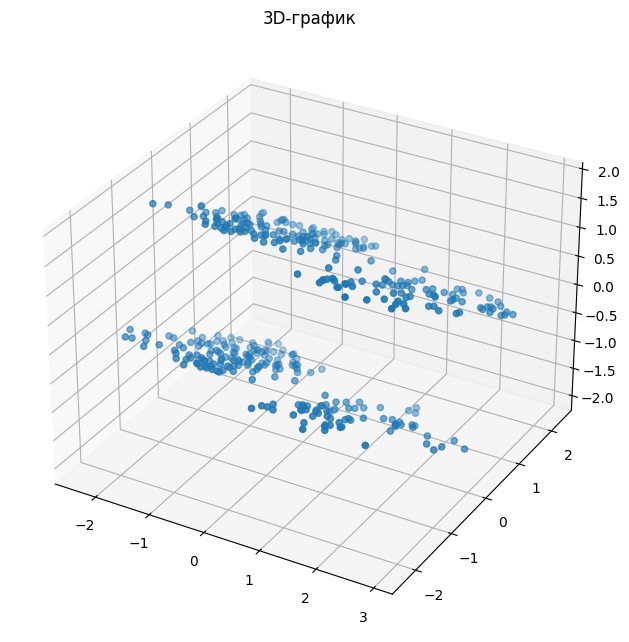

In [20]:
# загружаем датасет penguins
# df = sns.load_dataset("penguins")

# загружаем датасет из лекции по логистической регрессии
df = pd.read_csv('User_Data.csv')

main_function(df)